<a href="https://colab.research.google.com/github/mattfarrow1/7331-machine-learning-1/blob/main/Labs/Lab1_Group4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab One: Visualization and Data Preprocessing

Matt Farrow, Amber Clark, Blake Freeman, Megan Ball

## **2015 Flight Delays and Cancellations**
Data Source: [Kaggle](https://www.kaggle.com/usdot/flight-delays?select=flights.csv)

## Business Understanding

`Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.`

The data set that our group selected came the U.S. Department of Transportation's Bureau of Transportation Statistics and "tracks the on-time performance of domestic flights operated by large air carriers" during 2015 ([Kaggle](https://www.kaggle.com/usdot/flight-delays)). The data is broken up into three separate `.csv` files: one with flight details for 5,819,079 flights during 2015, one with 14 different U.S.-based airlines, and one with the geographic details of 322 U.S. airports. 

The data is important because it takes airline delays and cancellations, one of the aspects of airline travel that is popular fodder for public complaints, and quantifies it in a way that offers the possiblity of tangible analysis. For the purposes of this analysis, the two variables that we intend to measure are `ARRIVAL_DELAY` and `CANCELLATION`. 

### Arrival Delay

Although the data set contains a number of features related to when flights departed, delays, and air times, we made the decision that the most important feature for customers is the arrival delay. Arrival delay serves as the total delay experienced by the flight and accounts for previous delays as well as time that pilots were able to make up in the air. 

Becase arrival delay is a numeric value, regression and RMSE will be used to model and measure the feature. The model's effectiveness will measured using 10-fold cross-validation. 

### Cancellation

Cancellation is the other feature of interest. There are a number of reasons that a flight would be cancelled including airline cancellations, weather,national air system, and security reasons. 

This feature will be modeled using classification with accuracy being the primary measure. As with arrival delay, cancellation's effectiveness will be measured using 10-fold cross-validation.

## Data Meaning Type

`Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.`

### Load the Data

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [2]:
# Due to the way these columns are formatted, we want to keep the leading zeros during our import. Later on will convert them to a time format.
dtype_t = {'SCHEDULED_DEPARTURE': str,
           'DEPARTURE_TIME': str,
           'WHEELS_OFF': str,
           'SCHEDULED_TIME': str,
           'WHEELS_ON': str,
           'SCHEDULED_ARRIVAL': str,
           'ARRIVAL_TIME': str
          }

# Read in the data directly from GitHub
airlines = pd.read_csv('https://raw.githubusercontent.com/mattfarrow1/7331-machine-learning-1/main/Data/airlines.csv')
airports = pd.read_csv('https://raw.githubusercontent.com/mattfarrow1/7331-machine-learning-1/main/Data/airports.csv')
flights  = pd.read_csv('https://media.githubusercontent.com/media/mattfarrow1/7331-machine-learning-1/main/Data/flights.csv', dtype = dtype_t)

C:\Users\blake\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Look at the airline data
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [4]:
# Look at the airport data
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [5]:
# Look at the flight data
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,...,0408,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,...,0741,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,0811,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,...,0756,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,...,0259,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


#### TO DO (AMBER)

### Merge Flights & Airlines

The flight data will become our primary data set, but we can join it with the airline information to bring in the human-readable names.

In [6]:
# Rename columns in preparation for merge
airlines.rename(columns={'IATA_CODE': 'AIRLINE_CODE'}, inplace=True)
flights.rename(columns={'AIRLINE': 'AIRLINE_CODE'}, inplace=True)

In [7]:
# Merge data together
df = pd.merge(flights, airlines, on='AIRLINE_CODE', how = 'left')

In [8]:
# Look at the newly merged data
#df.head()

Our merged data set contains 5,819,079 observations and 32 attributes.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5819079 entries, 0 to 5819078
Data columns (total 32 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE_CODE         object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  object 
 10  DEPARTURE_TIME       object 
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           object 
 14  SCHEDULED_TIME       object 
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            object 
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    object 
 21  ARRIVAL_TIME         object 
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

### Convert String Columns to Datetime

In [10]:
# Convert string columns to datetime
# Source: https://stackoverflow.com/questions/41514173/change-multiple-columns-in-pandas-dataframe-to-datetime
#df.iloc[:, [9, 10, 13, 18, 20, 21]] = df.iloc[:, [9, 10, 13, 18, 20, 21]].apply(pd.to_datetime, format='%H%M', errors = 'coerce')

In [11]:
cols = ["SCHEDULED_DEPARTURE", 
   "DEPARTURE_TIME", 
   "WHEELS_OFF",  
   "WHEELS_ON", 
   "SCHEDULED_ARRIVAL", 
   "ARRIVAL_TIME"]

df[cols] = df[cols].apply(pd.to_datetime, format = '%H%M', errors='coerce')

#df[cols] = df[cols].apply(pd.to_datetime, exact = False, format = '%H%M')
#df[cols] = df[cols].apply(datetime.strptime,format = '%H%M')

In [12]:
df[["SCHEDULED_DEPARTURE", 
   "DEPARTURE_TIME", 
   "WHEELS_OFF", 
   "WHEELS_ON", 
   "SCHEDULED_ARRIVAL", 
   "ARRIVAL_TIME"]].head()

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,WHEELS_OFF,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME
0,1900-01-01 00:05:00,1900-01-01 23:54:00,1900-01-01 00:15:00,1900-01-01 04:04:00,1900-01-01 04:30:00,1900-01-01 04:08:00
1,1900-01-01 00:10:00,1900-01-01 00:02:00,1900-01-01 00:14:00,1900-01-01 07:37:00,1900-01-01 07:50:00,1900-01-01 07:41:00
2,1900-01-01 00:20:00,1900-01-01 00:18:00,1900-01-01 00:34:00,1900-01-01 08:00:00,1900-01-01 08:06:00,1900-01-01 08:11:00
3,1900-01-01 00:20:00,1900-01-01 00:15:00,1900-01-01 00:30:00,1900-01-01 07:48:00,1900-01-01 08:05:00,1900-01-01 07:56:00
4,1900-01-01 00:25:00,1900-01-01 00:24:00,1900-01-01 00:35:00,1900-01-01 02:54:00,1900-01-01 03:20:00,1900-01-01 02:59:00


### Convert YEAR, MONTH, DAY into a Single Date

In [13]:
# Source: https://stackoverflow.com/questions/54487059/pandas-how-to-create-a-single-date-column-from-columns-containing-year-month
df['FLIGHT_DATE'] = pd.to_datetime([f'{y}-{m}-{d}' for y, m, d in zip(df.YEAR, df.MONTH, df.DAY)])

## Data Quality

`Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.`

### Missing Values

In [14]:
# How many missing values are there in the data?
df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE_CODE                 0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86666
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89774
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                94518
TAXI_IN                  92513
SCHEDULED_ARRIVAL            2
ARRIVAL_TIME             94969
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
AIRLINE                      0
FLIGHT_D

There are millions of missing values in the specific delay time columns. This is expected, as not every flight is delayed, and you would hope that percentage would be small of the overall flights. We will convert these missing values into `0` since, in these cases, there was no flight delay for the specific attribute.

In [15]:
# Replace missing values in AIRLINE_DELAY, AIR_SYSTEM_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY, and WEATHER_DELAY with '0'
df[['AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']] = df[['AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].fillna(value = 0)

Similar to the delay columns, the `CANCELLATION_REASON` column also contains millions of missing values. Here we convert the missing values to `0` and use one hot encoding on the resulting column.

In [16]:
# One hot encode CANCELLATION_REASON where NA = 0
# Source: datagy.io/pandas-get-dummies/

# Convert missing values to 'N' for 'N/A'
df['CANCELLATION_REASON'] = df['CANCELLATION_REASON'].fillna('N')

# One hot encode
one_hot_columns = ['CANCELLATION_REASON']

for column in one_hot_columns:
  tempdf = pd.get_dummies(df[column], prefix=column)

  df = pd.merge(
      left = df,
      right = tempdf,
      left_index = True,
      right_index = True,
  )

  df = df.drop(columns=column)

df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,FLIGHT_DATE,CANCELLATION_REASON_A,CANCELLATION_REASON_B,CANCELLATION_REASON_C,CANCELLATION_REASON_D,CANCELLATION_REASON_N
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,1900-01-01 00:05:00,...,0.0,0.0,0.0,Alaska Airlines Inc.,2015-01-01,0,0,0,0,1
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,1900-01-01 00:10:00,...,0.0,0.0,0.0,American Airlines Inc.,2015-01-01,0,0,0,0,1
2,2015,1,1,4,US,840,N171US,SFO,CLT,1900-01-01 00:20:00,...,0.0,0.0,0.0,US Airways Inc.,2015-01-01,0,0,0,0,1
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,1900-01-01 00:20:00,...,0.0,0.0,0.0,American Airlines Inc.,2015-01-01,0,0,0,0,1
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,1900-01-01 00:25:00,...,0.0,0.0,0.0,Alaska Airlines Inc.,2015-01-01,0,0,0,0,1


In [17]:
# How many missing values are there in the data now?
#df.isnull().sum()

Here the remaining rows containing missing data only account for about 2% of the total number of original observations. We feel comfortable removing those rows with missing values and proceeding with our analysis.

In [18]:
#update missing values in times to 0. will be updating times to a binary (1 = yes action happened, 0 = no action happened)
df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].fillna(0)
#change all non-null values to 1
df.loc[(df.DEPARTURE_TIME != '0'), 'DEPARTURE_TIME'] = 1

#change column name to 'DEPARTED'
df.rename(columns={'DEPARTURE_TIME': 'DEPARTED'}, inplace=True)

#df.isna().sum()

In [19]:
#update remaining columns using same logic

cols = ['WHEELS_OFF','WHEELS_ON','ARRIVAL_TIME']
df[cols] = df[cols].fillna(0)

df.loc[(df.WHEELS_OFF != '0'), 'WHEELS_OFF'] = 1
df.loc[(df.WHEELS_ON != '0'), 'WHEELS_ON'] = 1
df.loc[(df.ARRIVAL_TIME != '0'), 'ARRIVAL_TIME'] = 1

df.rename(columns={'ARRIVAL_TIME': 'ARRIVED'}, inplace=True)

#df.isna().sum()

In [20]:
#fill missing values with 0
cols = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']
df[cols] = df[cols].fillna(0)
#df.isna().sum()

In [21]:
#change remaining null values to 0 if flight was cancelled
df.loc[(df.CANCELLED == 1), ('DEPARTURE_DELAY', 'TAXI_OUT', 'ELAPSED_TIME','AIR_TIME','TAXI_IN','ARRIVAL_DELAY')] = 0
#df.isna().sum()

In [22]:
#remove remaining null value
df = df.dropna()

In [23]:
df.isna().sum()

YEAR                     0
MONTH                    0
DAY                      0
DAY_OF_WEEK              0
AIRLINE_CODE             0
FLIGHT_NUMBER            0
TAIL_NUMBER              0
ORIGIN_AIRPORT           0
DESTINATION_AIRPORT      0
SCHEDULED_DEPARTURE      0
DEPARTED                 0
DEPARTURE_DELAY          0
TAXI_OUT                 0
WHEELS_OFF               0
SCHEDULED_TIME           0
ELAPSED_TIME             0
AIR_TIME                 0
DISTANCE                 0
WHEELS_ON                0
TAXI_IN                  0
SCHEDULED_ARRIVAL        0
ARRIVED                  0
ARRIVAL_DELAY            0
DIVERTED                 0
CANCELLED                0
AIR_SYSTEM_DELAY         0
SECURITY_DELAY           0
AIRLINE_DELAY            0
LATE_AIRCRAFT_DELAY      0
WEATHER_DELAY            0
AIRLINE                  0
FLIGHT_DATE              0
CANCELLATION_REASON_A    0
CANCELLATION_REASON_B    0
CANCELLATION_REASON_C    0
CANCELLATION_REASON_D    0
CANCELLATION_REASON_N    0
d

Need to have text to go throught the process that was taken to remove the Null values. 

In [170]:
duplicate = df[df.duplicated()]
duplicate

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,CANCELLATION_REASON_B,CANCELLATION_REASON_C,CANCELLATION_REASON_D,CANCELLATION_REASON_N,DEPARTURE_DELAY_log,ARRIVAL_DELAY_Log,DISTANCE_log,TAXI_IN_Log,ELAPSED_TIME_log,AIR_TIME_log


After addressing the Null Values, it was checked to see if there was any duplicated data in our data set. As displayed above no results came up after checking for any duplicated rows.

### Outliers

In [24]:
#df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,DEPARTURE_DELAY,TAXI_OUT,ELAPSED_TIME,AIR_TIME,DISTANCE,...,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLATION_REASON_A,CANCELLATION_REASON_B,CANCELLATION_REASON_C,CANCELLATION_REASON_D,CANCELLATION_REASON_N
count,5789165.0,5.789165e+06,5.789165e+06,5.789165e+06,5.789165e+06,5.789165e+06,5.789165e+06,5.789165e+06,5.789165e+06,5.789165e+06,...,5.789165e+06,5.789165e+06,5.789165e+06,5.789165e+06,5.789165e+06,5.789165e+06,5.789165e+06,5.789165e+06,5.789165e+06,5.789165e+06
mean,2015.0,6.529244e+00,1.570191e+01,3.928717e+00,2.174812e+03,9.174156e+00,1.585693e+01,1.352275e+02,1.120380e+02,8.216556e+02,...,2.476309e+00,1.398906e-02,3.484605e+00,4.311822e+00,5.355233e-01,3.496359e-03,7.000491e-03,2.481878e-03,3.800203e-06,9.870175e-01
std,0.0,3.403785e+00,8.780918e+00,1.988249e+00,1.758028e+03,3.666456e+01,9.010045e+00,7.534131e+01,7.290175e+01,6.073949e+02,...,1.308833e+01,9.191515e-01,2.190996e+01,2.062496e+01,8.830108e+00,5.902656e-02,8.337557e-02,4.975659e-02,1.949407e-03,1.131989e-01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.100000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.310000e+02,-5.000000e+00,1.100000e+01,8.100000e+01,5.900000e+01,3.720000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.691000e+03,-1.000000e+00,1.400000e+01,1.170000e+02,9.300000e+01,6.470000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.234000e+03,7.000000e+00,1.900000e+01,1.680000e+02,1.430000e+02,1.062000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,1.988000e+03,2.250000e+02,7.660000e+02,6.900000e+02,4.983000e+03,...,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


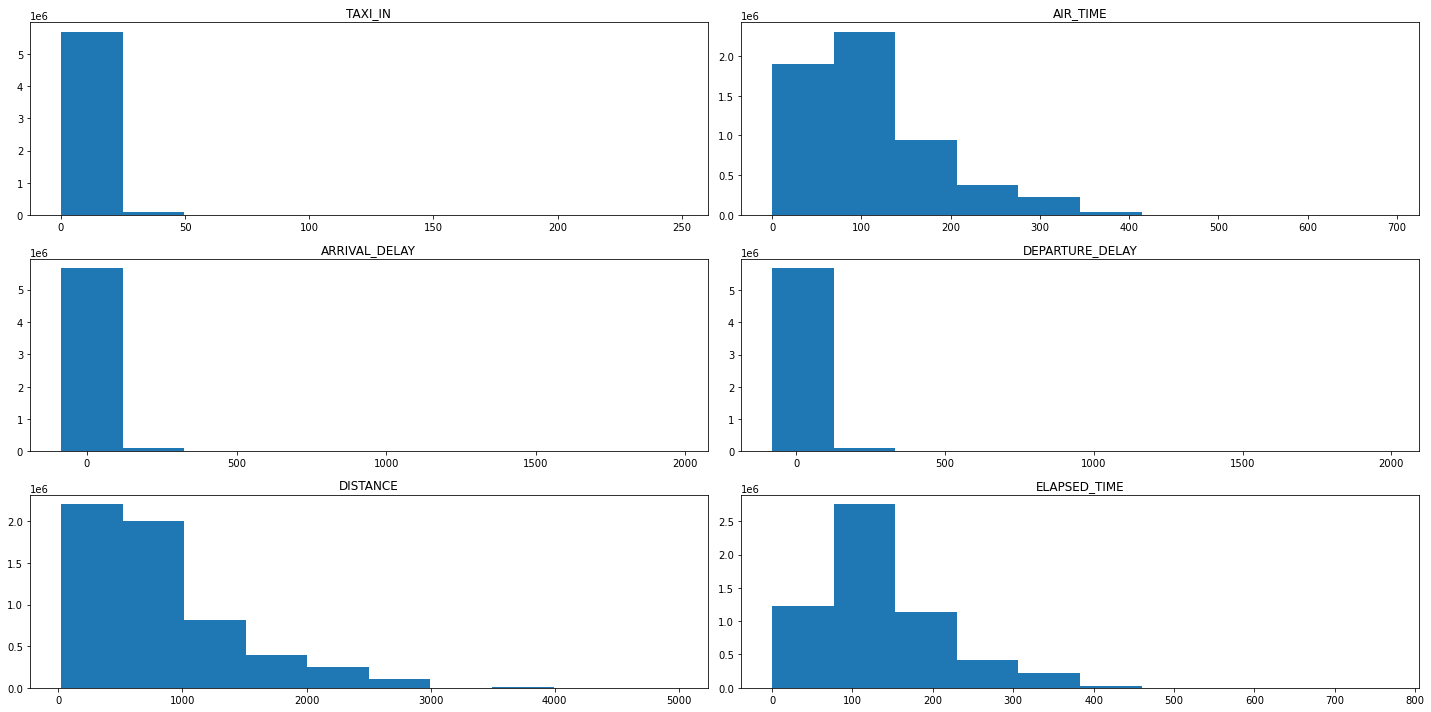

In [149]:
#Code: https://matplotlib.org/stable/gallery/statistics/histogram_multihist.html


fig, ((ax0, ax1), (ax2, ax3),(ax4, ax5)) = plt.subplots( figsize=(20,10),nrows=3, ncols=2)


ax0.hist(df["TAXI_IN"])
ax0.set_title('TAXI_IN')


ax1.hist(df["AIR_TIME"])
ax1.set_title('AIR_TIME')


ax2.hist(df["ARRIVAL_DELAY"])
ax2.set_title('ARRIVAL_DELAY')


ax3.hist(df["DEPARTURE_DELAY"])
ax3.set_title('DEPARTURE_DELAY')

ax4.hist(df["DISTANCE"])
ax4.set_title('DISTANCE')

ax5.hist(df["ELAPSED_TIME"])
ax5.set_title('ELAPSED_TIME')

fig.tight_layout()
plt.show()

The firgures above indicate a right skew for all the Variables listed above. 

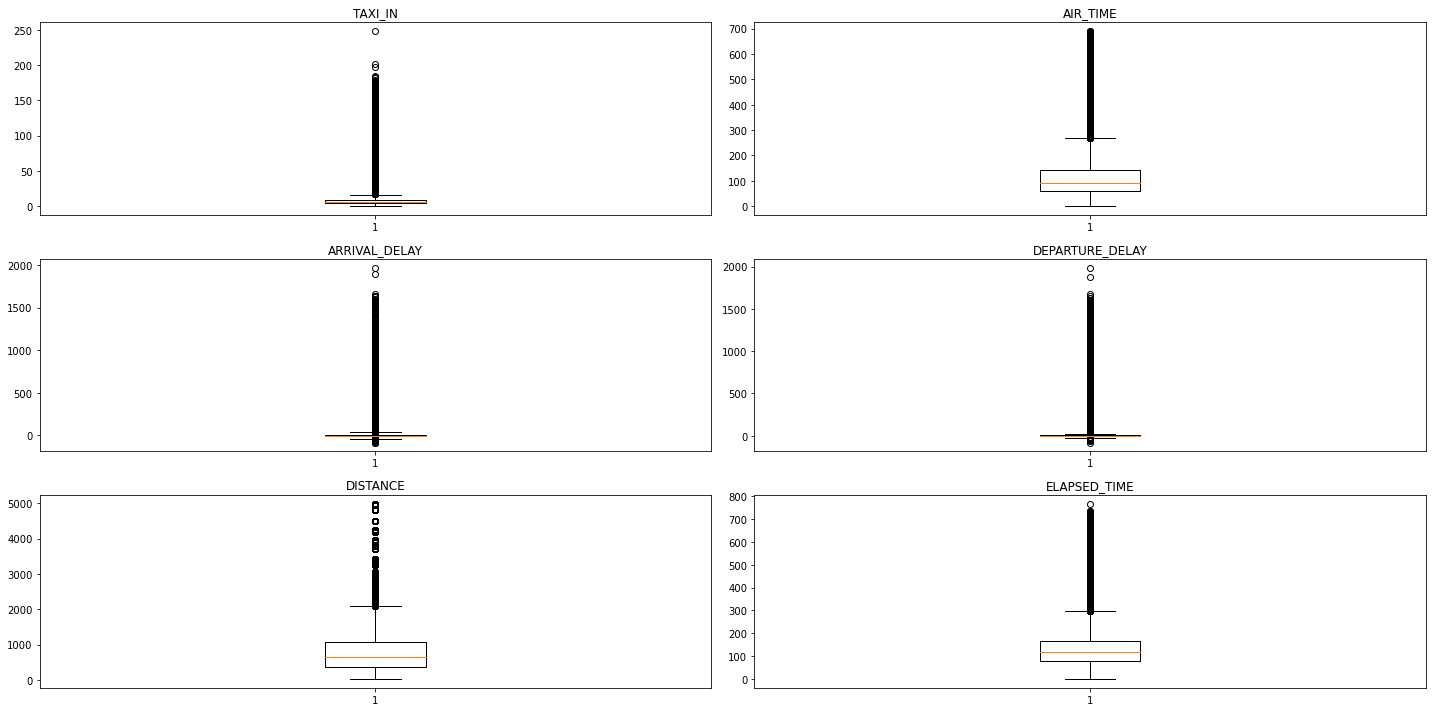

In [151]:
fig, ((ax0, ax1), (ax2, ax3),(ax4, ax5)) = plt.subplots( figsize=(20,10),nrows=3, ncols=2)


ax0.boxplot(df["TAXI_IN"])
ax0.set_title('TAXI_IN')


ax1.boxplot(df["AIR_TIME"])
ax1.set_title('AIR_TIME')


ax2.boxplot(df["ARRIVAL_DELAY"])
ax2.set_title('ARRIVAL_DELAY')


ax3.boxplot(df["DEPARTURE_DELAY"])
ax3.set_title('DEPARTURE_DELAY')

ax4.boxplot(df["DISTANCE"])
ax4.set_title('DISTANCE')

ax5.boxplot(df["ELAPSED_TIME"])
ax5.set_title('ELAPSED_TIME')

fig.tight_layout()
plt.show()

In addtion to being righted skewed all the outputs have a large amount of variables present.  This will cause it to be nessary to do a log transformation of the data set on theses selected variables. 

In [179]:
#log transformation keeping the 0 in the data sets 
df_log["DEPARTURE_DELAY_log"] = df_log["DEPARTURE_DELAY"].map(lambda i: np.log1p(i) if i > 0 else 0) 
df_log["ARRIVAL_DELAY_Log"] = df_log["ARRIVAL_DELAY"].map(lambda i: np.log1p(i) if i > 0 else 0)
df_log["DISTANCE_log"] = df_log["DISTANCE"].map(lambda i: np.log1p(i) if i > 0 else 0) 
df_log["TAXI_IN_Log"] = df_log["TAXI_IN"].map(lambda i: np.log1p(i) if i > 0 else 0)
df_log["ELAPSED_TIME_log"] = df_log["ELAPSED_TIME"].map(lambda i: np.log1p(i) if i > 0 else 0) 
df_log["AIR_TIME_log"] = df_log["AIR_TIME"].map(lambda i: np.log1p(i) if i > 0 else 0) 

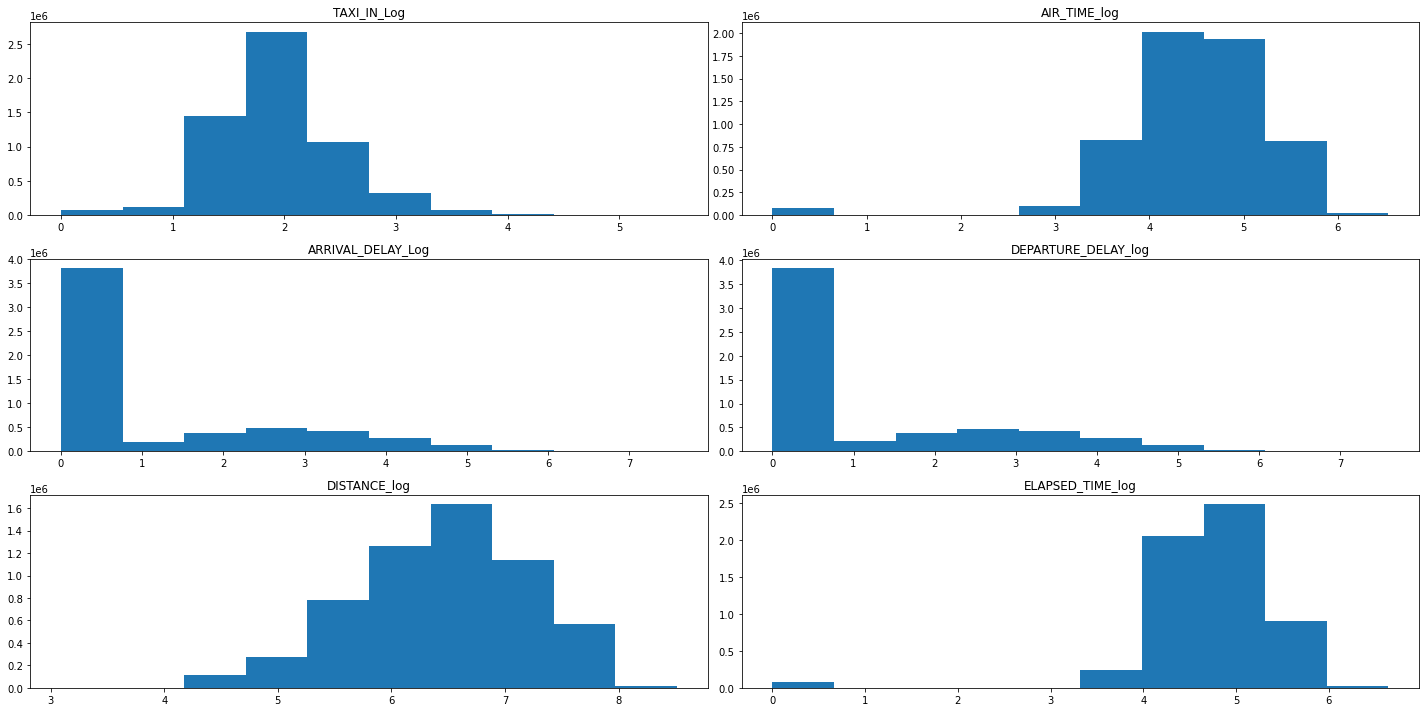

In [180]:
#Code: https://matplotlib.org/stable/gallery/statistics/histogram_multihist.html

fig, ((ax0, ax1), (ax2, ax3),(ax4, ax5)) = plt.subplots( figsize=(20,10),nrows=3, ncols=2)


ax0.hist(df_log["TAXI_IN_Log"])
ax0.set_title('TAXI_IN_Log')


ax1.hist(df_log["AIR_TIME_log"])
ax1.set_title('AIR_TIME_log')


ax2.hist(df_log["ARRIVAL_DELAY_Log"])
ax2.set_title('ARRIVAL_DELAY_Log')


ax3.hist(df_log["DEPARTURE_DELAY_log"])
ax3.set_title('DEPARTURE_DELAY_log')

ax4.hist(df_log["DISTANCE_log"])
ax4.set_title('DISTANCE_log')

ax5.hist(df_log["ELAPSED_TIME_log"])
ax5.set_title('ELAPSED_TIME_log')

fig.tight_layout()
plt.show()

After the log transformations we have more evenly distributed varibles however CANCELLED variable which was decided to be set at zero and used to populate missing data caused there to be a offset in the data sets and stops full Normilization of the data. 

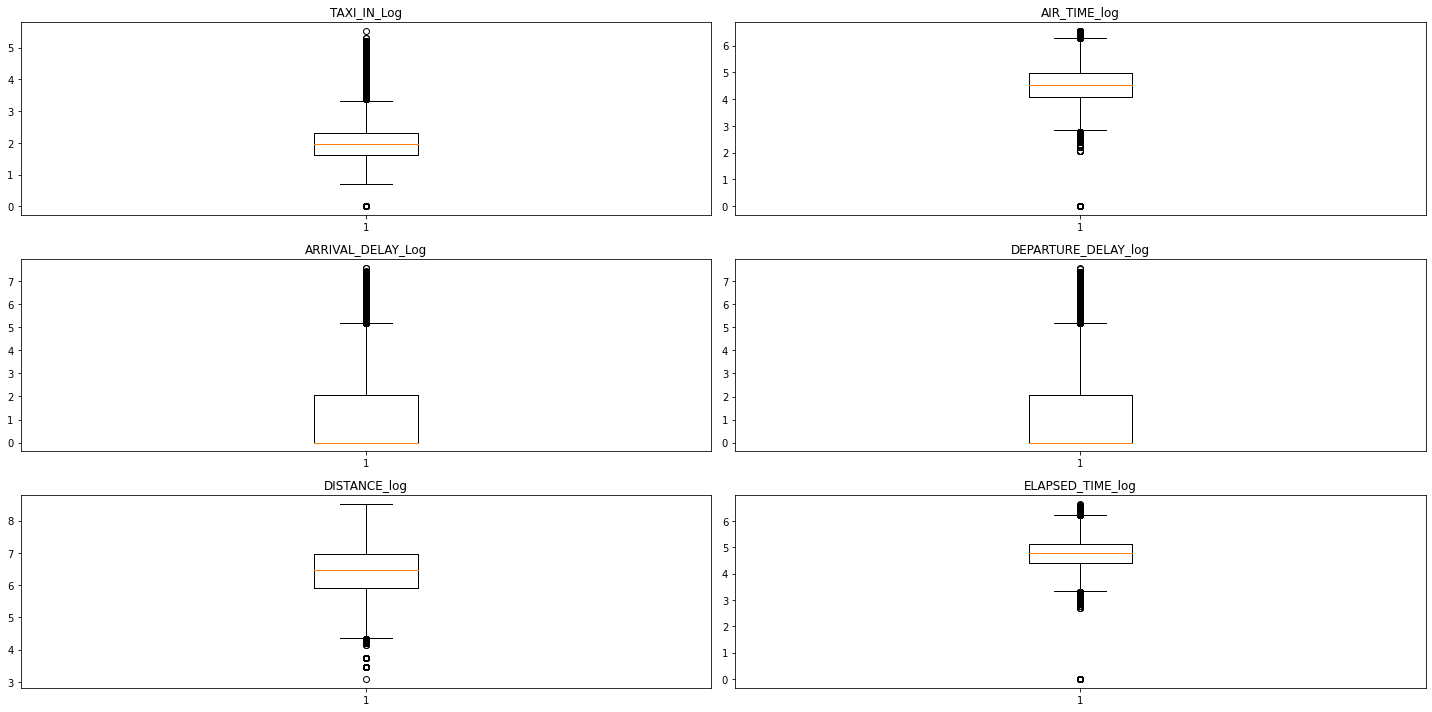

In [181]:
fig, ((ax0, ax1), (ax2, ax3),(ax4, ax5)) = plt.subplots( figsize=(20,10),nrows=3, ncols=2)


ax0.boxplot(df_log["TAXI_IN_Log"])
ax0.set_title('TAXI_IN_Log')


ax1.boxplot(df_log["AIR_TIME_log"])
ax1.set_title('AIR_TIME_log')


ax2.boxplot(df_log["ARRIVAL_DELAY_Log"])
ax2.set_title('ARRIVAL_DELAY_Log')


ax3.boxplot(df_log["DEPARTURE_DELAY_log"])
ax3.set_title('DEPARTURE_DELAY_log')

ax4.boxplot(df_log["DISTANCE_log"])
ax4.set_title('DISTANCE_log')

ax5.boxplot(df_log["ELAPSED_TIME_log"])
ax5.set_title('ELAPSED_TIME_log')

fig.tight_layout()
plt.show()

This figure above displays the distrbution of still existing outliers after the log transformations. 

In [182]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5789165 entries, 0 to 5819078
Data columns (total 43 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   YEAR                   int64         
 1   MONTH                  int64         
 2   DAY                    int64         
 3   DAY_OF_WEEK            int64         
 4   AIRLINE_CODE           object        
 5   FLIGHT_NUMBER          int64         
 6   TAIL_NUMBER            object        
 7   ORIGIN_AIRPORT         object        
 8   DESTINATION_AIRPORT    object        
 9   SCHEDULED_DEPARTURE    datetime64[ns]
 10  DEPARTED               object        
 11  DEPARTURE_DELAY        float64       
 12  TAXI_OUT               float64       
 13  WHEELS_OFF             object        
 14  SCHEDULED_TIME         object        
 15  ELAPSED_TIME           float64       
 16  AIR_TIME               float64       
 17  DISTANCE               int64         
 18  WHEELS_ON             

The figure above displays the orginal Arrival Delay with no transformations and indicated there is a right skew in the data set. 

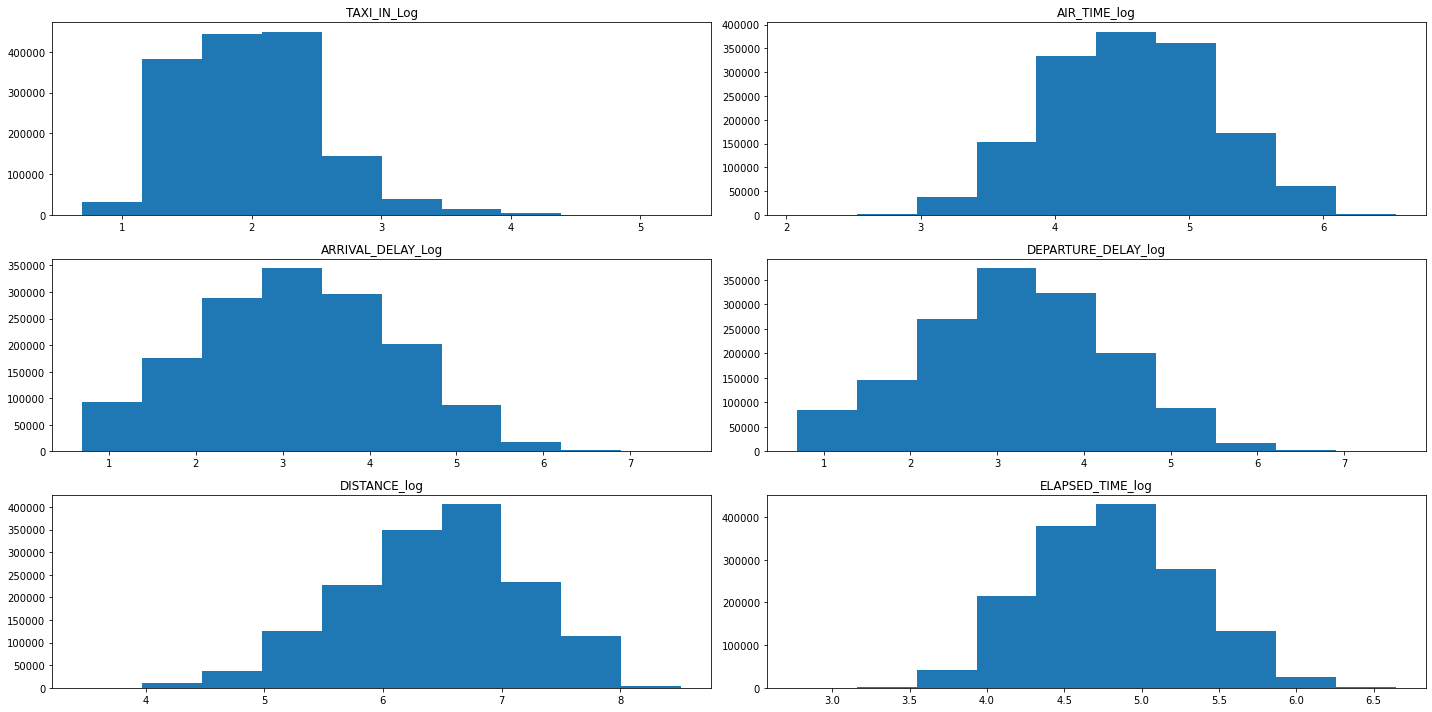

In [183]:
df_log_no_0 = df_log
df_log_no_0 =df_log_no_0[df_log_no_0['DEPARTURE_DELAY_log'] !=0]
df_log_no_0 =df_log_no_0[df_log_no_0['ARRIVAL_DELAY_Log'] !=0]

fig, ((ax0, ax1), (ax2, ax3),(ax4, ax5)) = plt.subplots( figsize=(20,10),nrows=3, ncols=2)


ax0.hist(df_log_no_0["TAXI_IN_Log"])
ax0.set_title('TAXI_IN_Log')


ax1.hist(df_log_no_0["AIR_TIME_log"])
ax1.set_title('AIR_TIME_log')


ax2.hist(df_log_no_0["ARRIVAL_DELAY_Log"])
ax2.set_title('ARRIVAL_DELAY_Log')


ax3.hist(df_log_no_0["DEPARTURE_DELAY_log"])
ax3.set_title('DEPARTURE_DELAY_log')

ax4.hist(df_log_no_0["DISTANCE_log"])
ax4.set_title('DISTANCE_log')

ax5.hist(df_log_no_0["ELAPSED_TIME_log"])
ax5.set_title('ELAPSED_TIME_log')

fig.tight_layout()
plt.show()

The figure above shows the removal of the cancelations from the data set to display there is a more even distribtion of the data. 

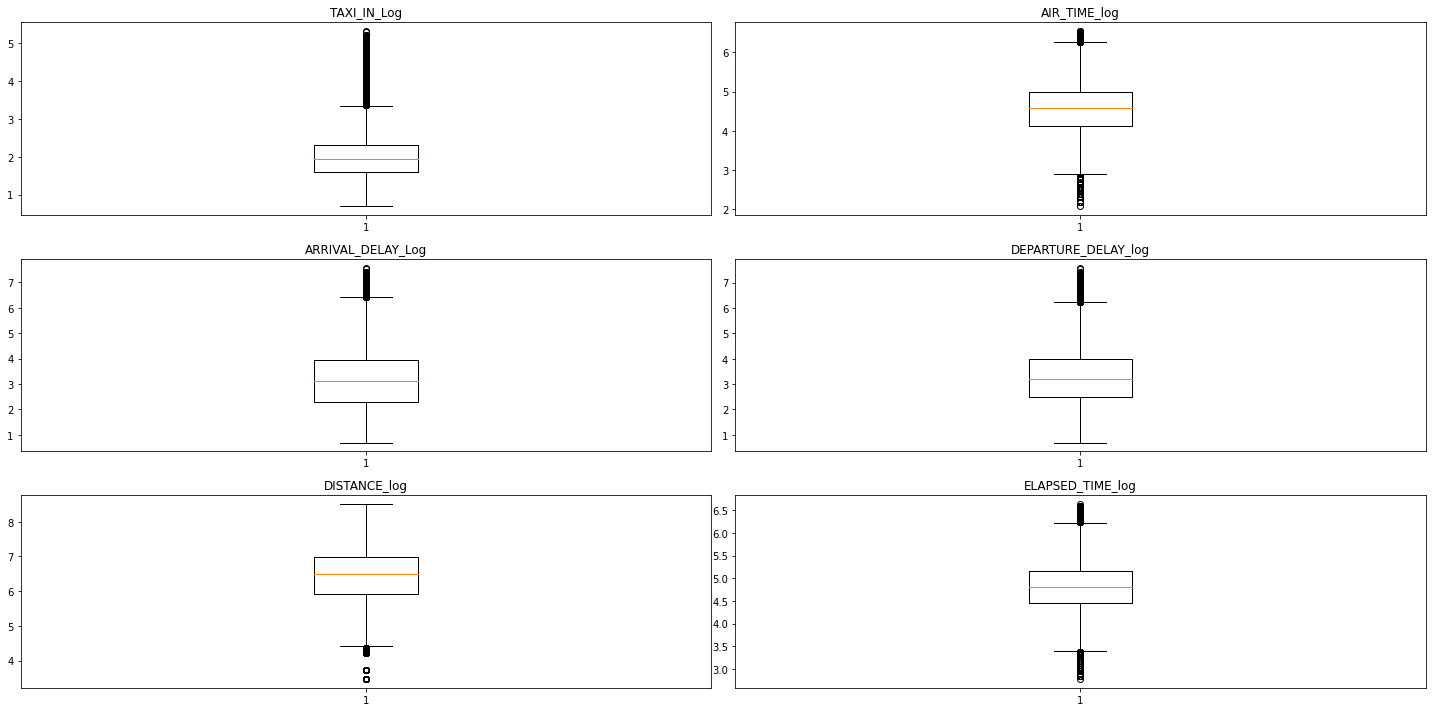

In [184]:
fig, ((ax0, ax1), (ax2, ax3),(ax4, ax5)) = plt.subplots( figsize=(20,10),nrows=3, ncols=2)


ax0.boxplot(df_log_no_0["TAXI_IN_Log"])
ax0.set_title('TAXI_IN_Log')


ax1.boxplot(df_log_no_0["AIR_TIME_log"])
ax1.set_title('AIR_TIME_log')


ax2.boxplot(df_log_no_0["ARRIVAL_DELAY_Log"])
ax2.set_title('ARRIVAL_DELAY_Log')


ax3.boxplot(df_log_no_0["DEPARTURE_DELAY_log"])
ax3.set_title('DEPARTURE_DELAY_log')

ax4.boxplot(df_log_no_0["DISTANCE_log"])
ax4.set_title('DISTANCE_log')

ax5.boxplot(df_log_no_0["ELAPSED_TIME_log"])
ax5.set_title('ELAPSED_TIME_log')

fig.tight_layout()
plt.show()

The figure above also shows the removal of the cancelations and the impact on outliers. This would cause the data to be more evenly distrbuted and the outliers present due to the size of our data would be acceptable. 

In [185]:
df_log_no_0['CANCELLED'].unique()

array([0], dtype=int64)

The check above displays that all cancelled flights were removed as there is no other value than 0 in the array. 

Based on the data we reviewed it was deterimed that the outliers present do influance the data even after the transformation and will not be removed or further transformed from the log transformations. In addtion, since Cancelled flights is one of the variables to be predicted instead of removing the null values for the canceled flights from Departure Delays and Arrival Delays these were converted into zero's and entered in. This did cause the data to have a right skew, however this is correct based on the determination that these values should be represented by zero since no flight occured. There was no Duplicated values in our orginal data set. 

In [ ]:
# Delays by airline


C:\Users\blake\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


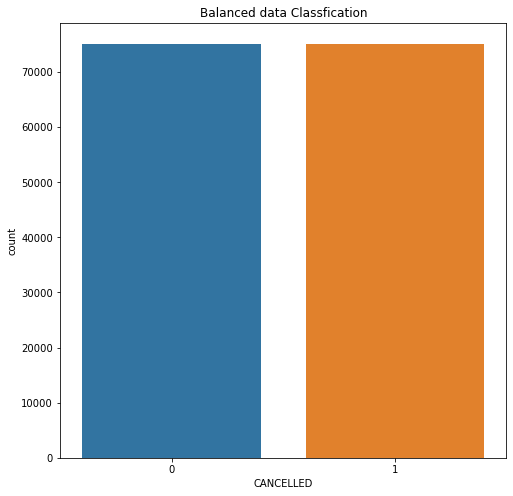

In [74]:
#again possible direction to take the data.

#code approprated from https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb

# Shuffle the Dataset.
shuffled_df = df.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
cancled_df = shuffled_df.loc[shuffled_df['CANCELLED'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
not_cancled_df = shuffled_df.loc[shuffled_df['CANCELLED'] == 0].sample(n=75158,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([cancled_df, not_cancled_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('CANCELLED', data=normalized_df)
plt.title('Balanced data based on Cancelled Variable')
plt.show()

In [71]:
df_count = df[['CANCELLED','YEAR']]
df_count.groupby(['CANCELLED']).count()

,YEAR
CANCELLED,
0,5714007
1,75158


Note... need to do some more work here, group at different scales or split out individually

#### TO DO (BLAKE)

- Address outliers
- Amber work on airport codes
- We need to finish cleaning up the time conversions (someone)

## Simple Statistics

`Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful.`

In [ ]:
df.describe()

In [ ]:
#check counts of cancels and diversions
df.groupby('CANCELLED')['YEAR'].count()

In [ ]:
df.groupby('DIVERTED')['YEAR'].count()

#### TO DO (MEGAN)


## Visualize Attributes

`Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.`

In [ ]:
# Flights by day of the week
sns.histplot(df, x = 'DAY_OF_WEEK', binwidth = 1)

In [ ]:
# Delays by airline
sns.stripplot(x='DEPARTURE_DELAY', y='AIRLINE',
              data=df, dodge=True, jitter=True)

plt.show()

sns.stripplot(x='ARRIVAL_DELAY', y='AIRLINE',
              data=df, dodge=True, jitter=True)

plt.show()

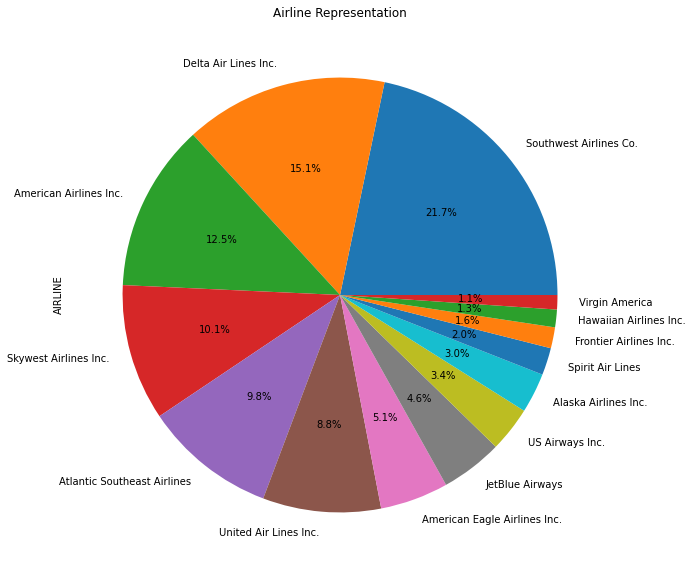

In [164]:
df['AIRLINE'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10,10))
plt.title('Airline Representation')
plt.show()

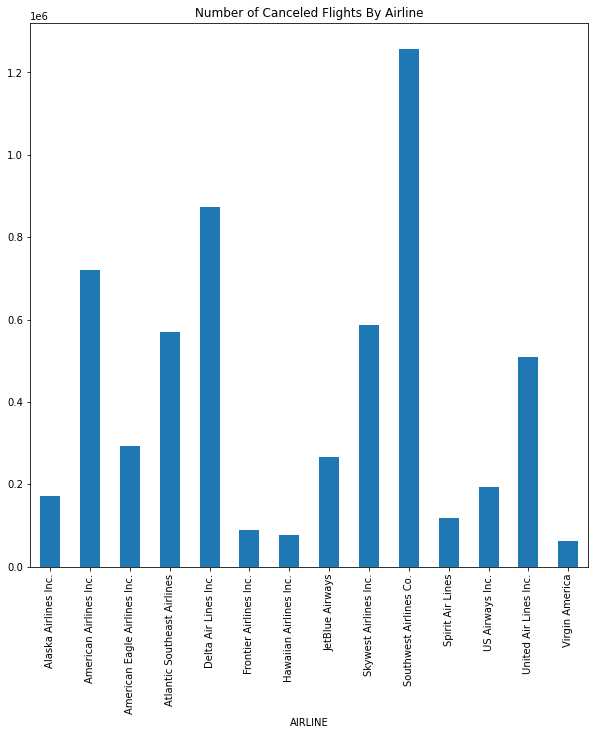

In [169]:
fig, (ax) = plt.subplots(figsize=(20,10))

ax = df.groupby(['AIRLINE'])['CANCELLED'].count().plot.bar(title="Number of Canceled Flights By Airline", figsize=(10,10))

plt.show()

American is the clear leader(?) here, but I also imagine they are one of the largest carriers in this list. Do the numbers skew the results here at all?

#### TO DO (EVERYONE)

- Create 2+ visualizations per person plus an explanation for each

## Explore Joint Attributes

`Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.`

In [ ]:
# Examine correlation visually using Seaborn. (Code adapted from 02. Data Visualization.ipynb)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.set(style = "darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize = (20, 20))

sns.heatmap(df.corr(), cmap=cmap, annot = True)

#### TO DO (MEGAN)

## Explore Attributes and Class

`Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).`

#### TO DO (AMBER)

## New Features 

`Are there other features that could be added to the data or created from existing features? Which ones?`

The New Features that are being considered to be added are listed below:

    Region: This would be a bucket crated from using the Departing Airport Data to determin what region the Airport is in and classify it accordingly. ie (Central US, Midwest US, ect.)
    
    Time of Day: This bucket would be created from the SCHEDULED_DEPARTURE variable to catagorize them by Early Morning, Morning, Afternoon, Evening. 
    
    Arrival Status: This would be created from using the Arrival_Delays variable to catagorize from early arrivals to having greater that an hour delay and beyond.
    
    There is also consideration to pair the data with Historical Nation Weather from Climate.gov or https://openweathermap.org/history to get weather that impacted delays to further determine the cause of the weather impacted delays. 

#### TO DO (BLAKE)

## Exceptional Work

`You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results. (aka PCA)`

In [ ]:
# Look at what continuous variables we have to work with
df.select_dtypes(np.number).head()

In [ ]:
# Select columns for PCA
df_numeric = df[['DEPARTURE_DELAY', 'TAXI_OUT', 'ELAPSED_TIME', 'AIR_TIME', 
            'DISTANCE', 'TAXI_IN', 'ARRIVAL_DELAY', 'DIVERTED', 
            'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 
            'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'CANCELLATION_REASON_A', 
            'CANCELLATION_REASON_B', 'CANCELLATION_REASON_C', 
            'CANCELLATION_REASON_D', 'CANCELLATION_REASON_N']]

In [ ]:
df_numeric.shape

In [ ]:
# Source: https://towardsdatascience.com/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0
# Standardize the features
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create the object
scaler = StandardScaler()
# Calculate the mean and standard deviation
scaler.fit(df_numeric)
df_pca_scaled = scaler.transform(df_numeric)

In [ ]:
# Calculate the PCA that explains 95% of the variance
pca_95 = PCA(n_components=0.95, random_state=2015)
pca_95.fit(df_pca_scaled)
df_pca_95 = pca_95.transform(df_pca_scaled)

# Display the PCA values
np.cumsum(pca_95.explained_variance_ratio_*100)

In [ ]:
# Plot PCA results
plt.plot(np.cumsum(pca_95.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

In [ ]:
df_post_pca = pd.DataFrame(df_pca_95, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
df_post_pca['Cancelled'] = df.CANCELLED
df_post_pca.head()